You are supposed to train and apply a boosting model for landcover classification. Below, you can find some code that already parses the data. For your submission, run and submit the extended jupyter notebook.

In [1]:
import numpy as np

In [2]:
# load data
train = np.load('./train.npz')
X_train = train["X"]
y_train = train["y"].reshape((-1,1))

test = np.load('./test.npz')
X_test = test["X"]
y_test = test["y"].reshape((-1,1))

classes = {
    1: "cultivated_land",
    2: "forest",
    3: "grassland",
    4: "shrubland",
    5: "water",
    8: "artificial_surface",
    9: "bareland"
}


In [3]:
print("Shape of training data: {}".format(X_train.shape))
print("Shape of training labels: {}".format(y_train.shape))
print("Shape of test data: {}".format(X_test.shape))
print("Shape of test labels: {}".format(y_test.shape))

Shape of training data: (6953, 12, 13, 13, 6)
Shape of training labels: (6953, 1)
Shape of test data: (1739, 12, 13, 13, 6)
Shape of test labels: (1739, 1)


The training and test set contain a few thousand instances. Each instance is based on image of size 13x13 pixels, which are available for 12 timestamps and 6 bands. That is, one is given an array of shape (12,13,13,6) for each instance. The label arrays contain the labels associated with the instances, where the central pixel/position determines the class of the (whole) image array for each instance, see below.

Label (i.e., class of pixel in the center of the images) for image sequence: forest


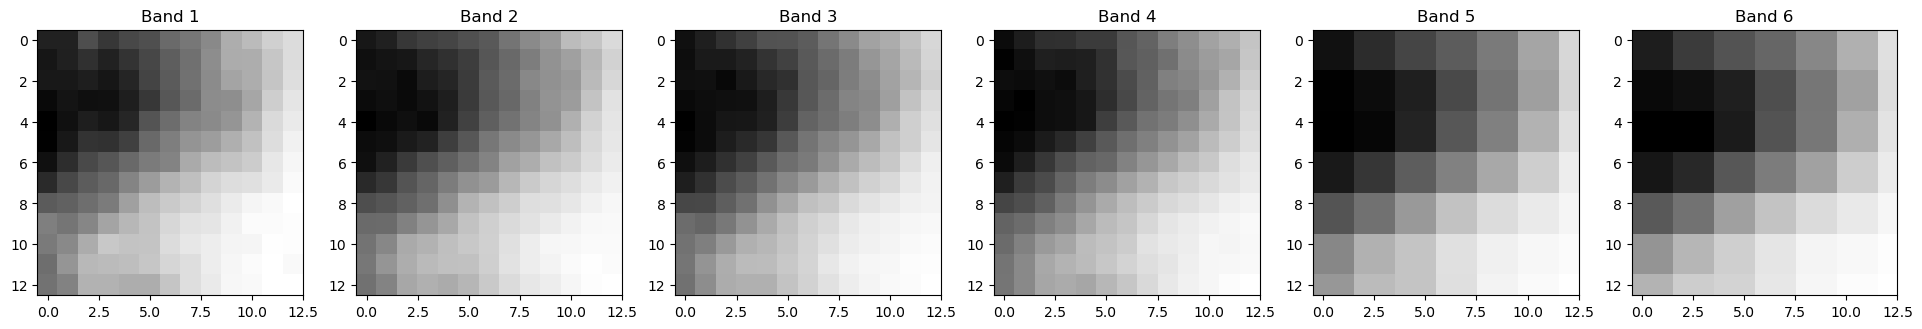

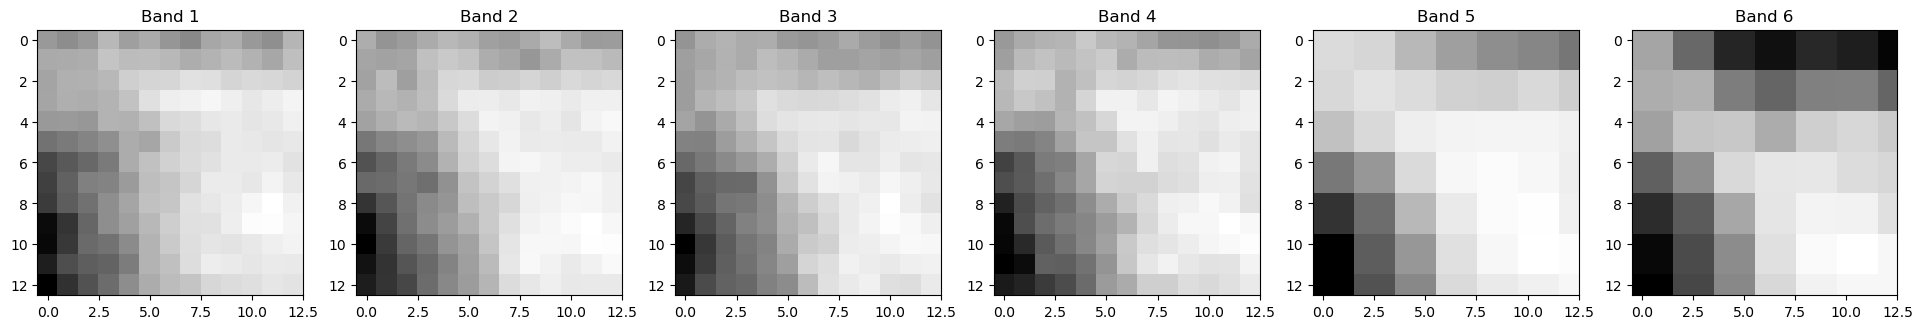

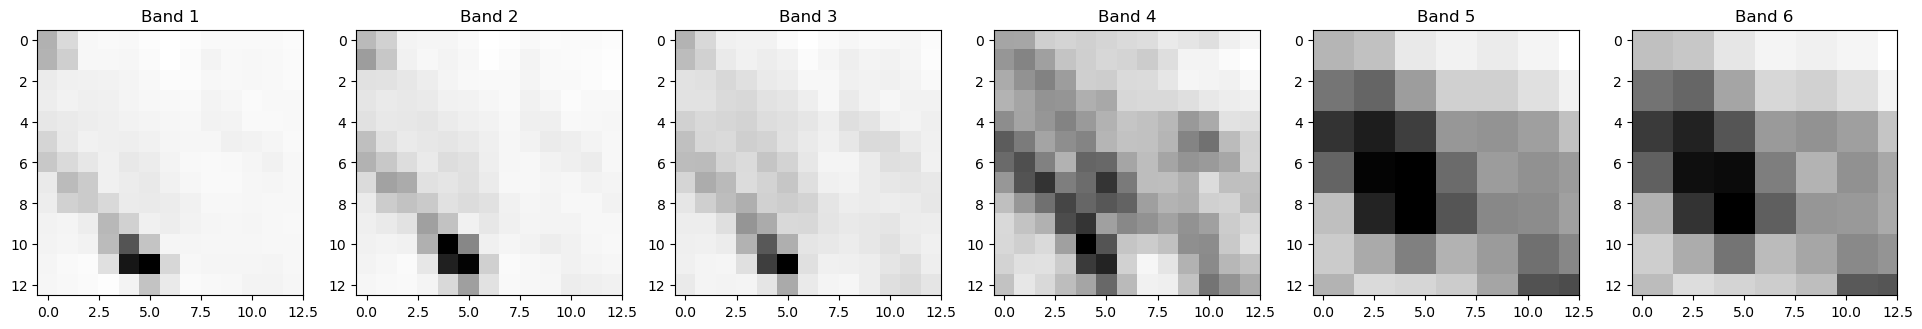

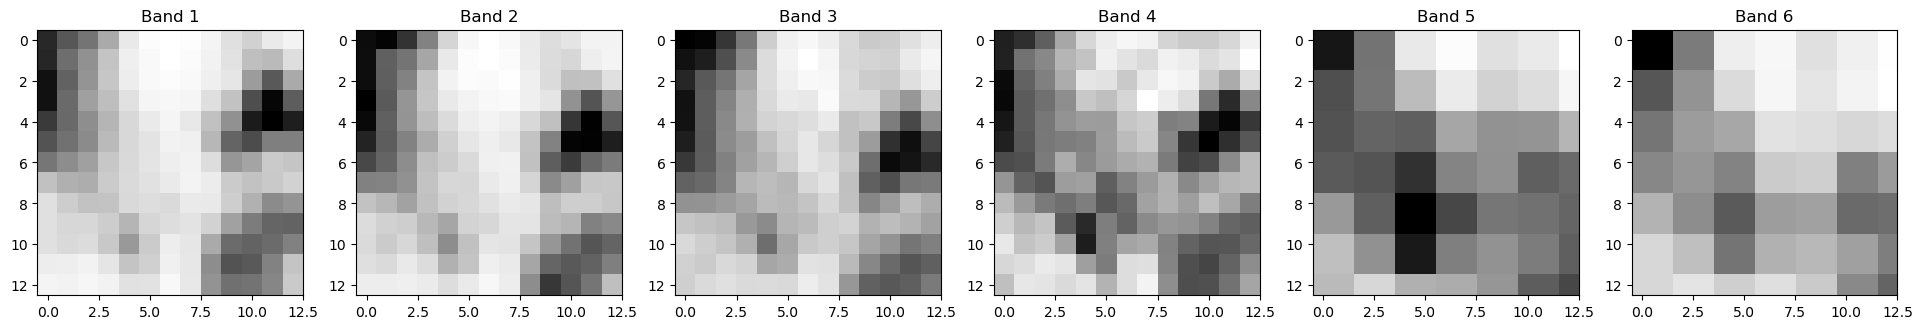

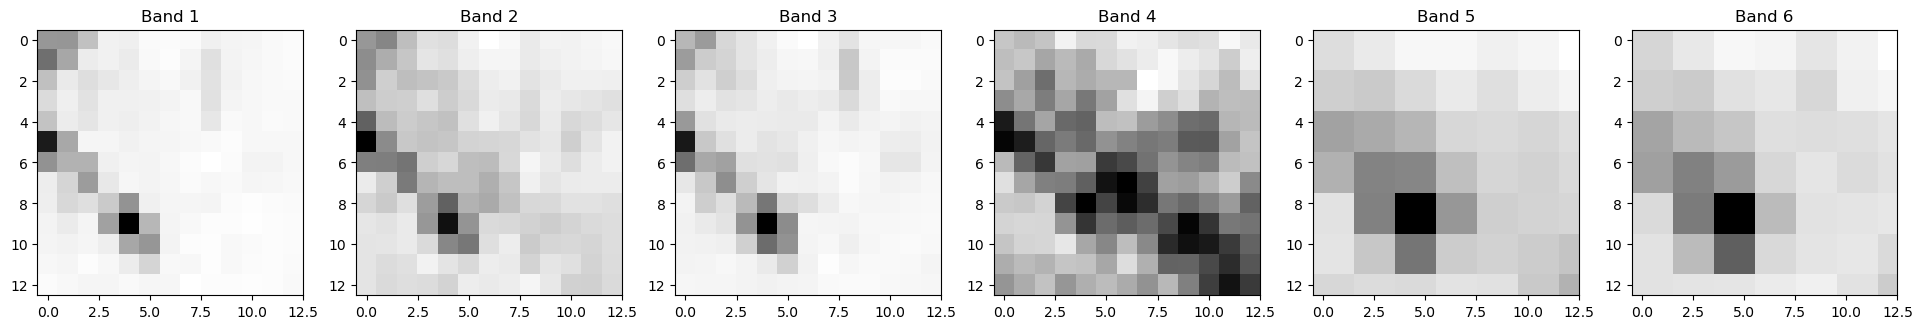

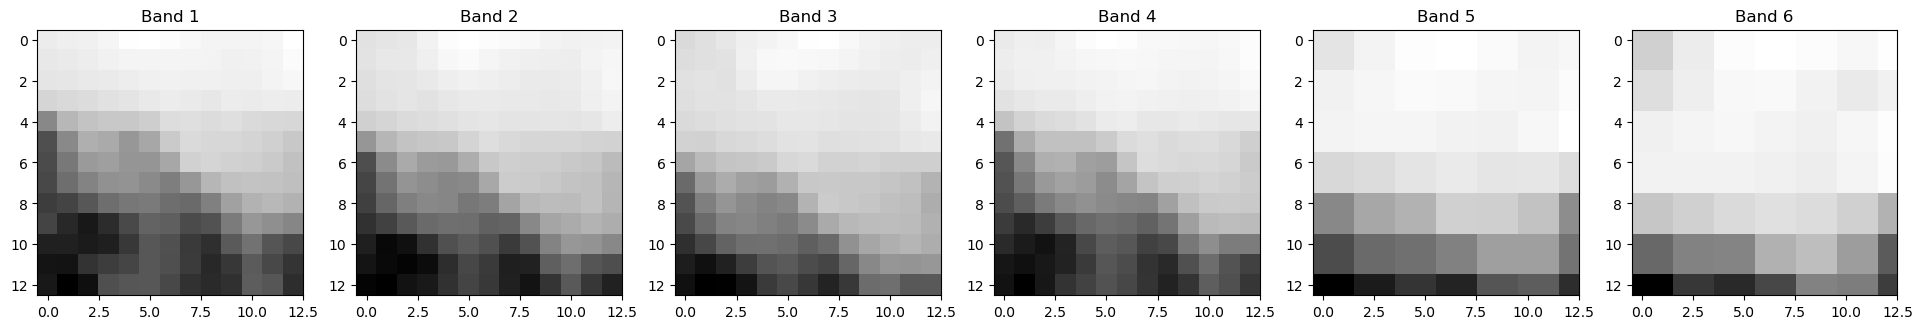

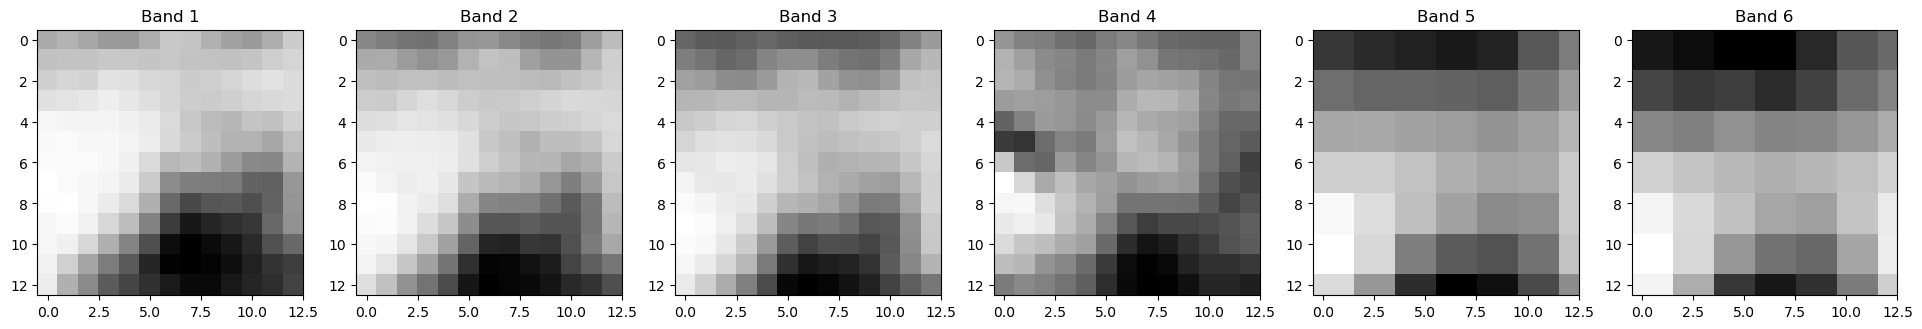

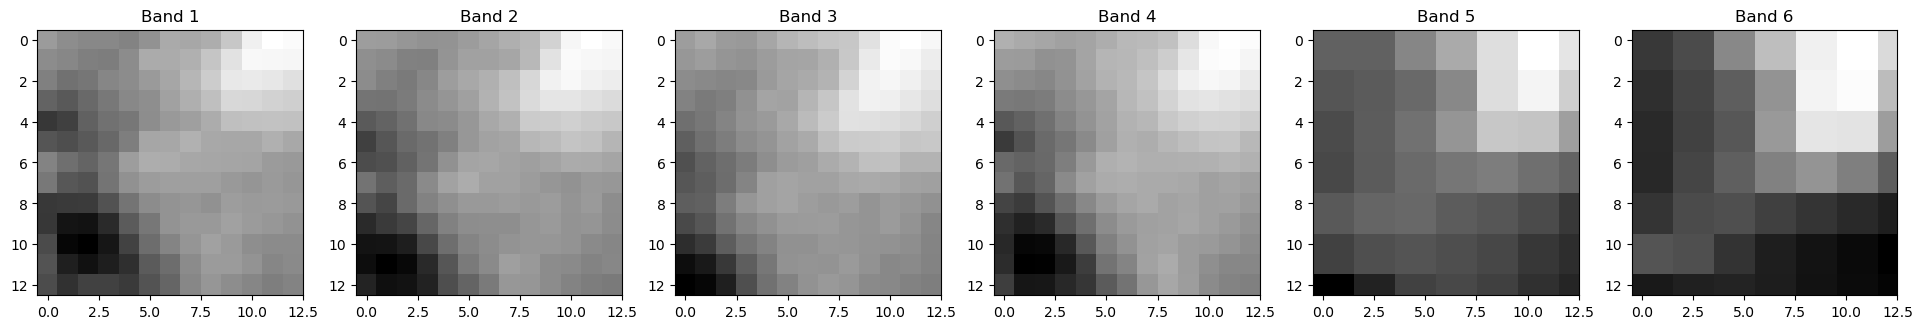

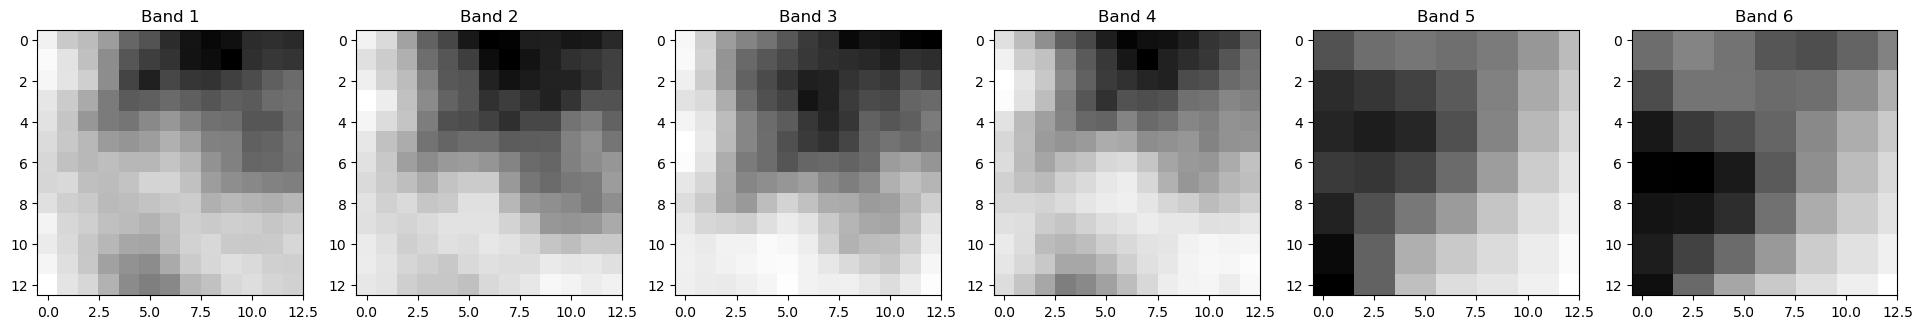

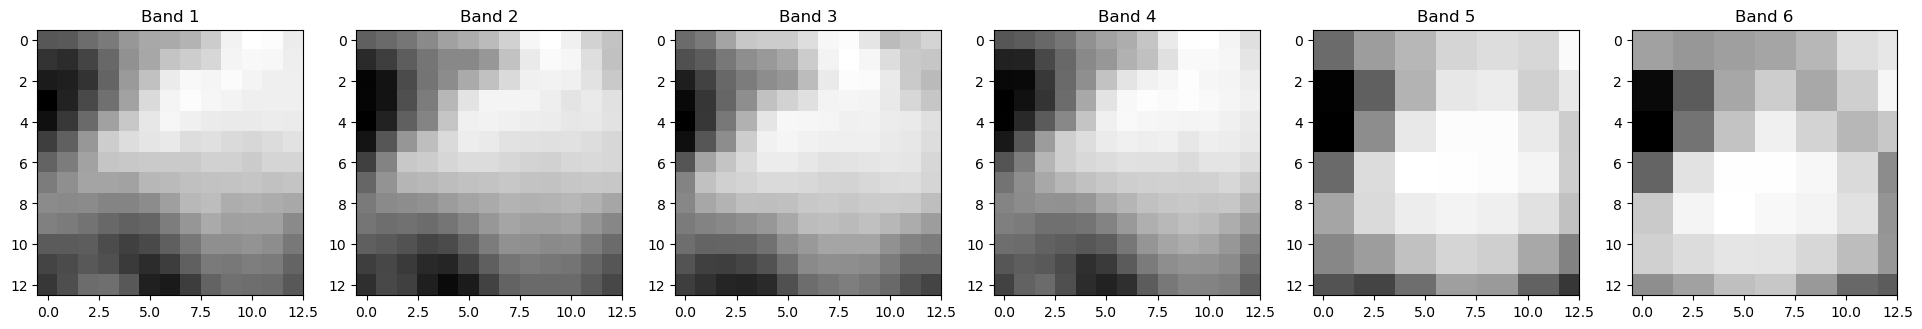

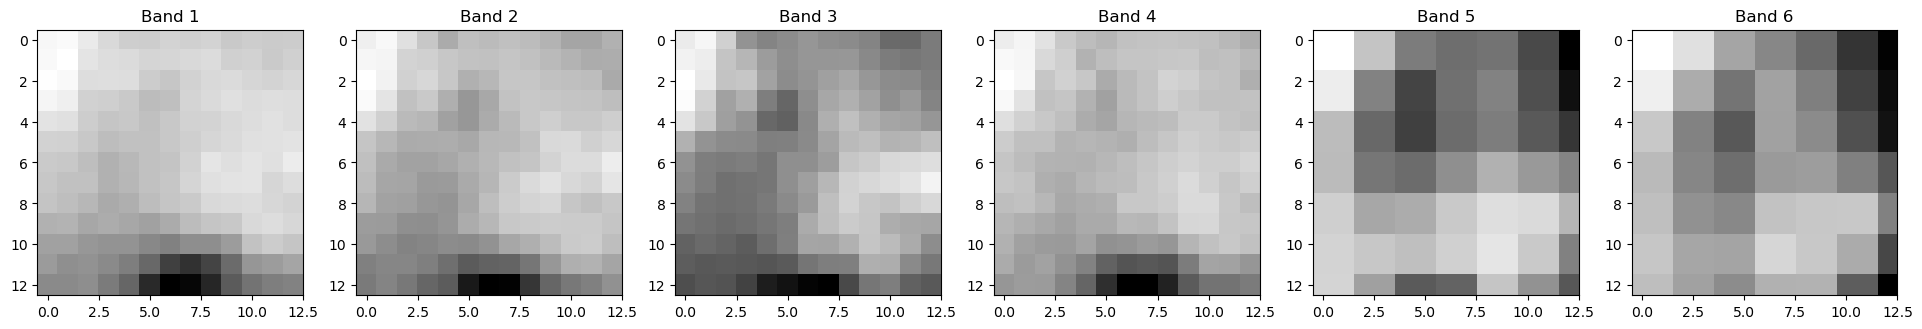

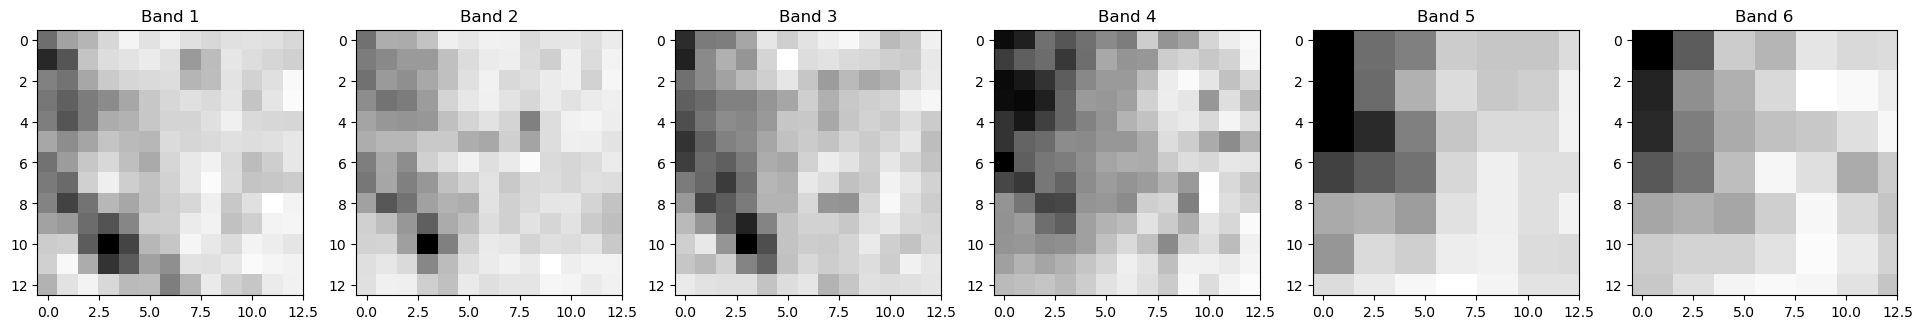

In [4]:
# visualize some of the (image) data

import matplotlib.cm as cm
import matplotlib.pyplot as plt

idx = 0

print("Label (i.e., class of pixel in the center of the images) for image sequence: {}".format(classes[y_train[idx,0]]))

for year in range(12):
    fig, axs = plt.subplots(1, 6, figsize=(24, 4))
    for b in range(6):
        axs[b].imshow(X_train[idx, year, :, :, b], cmap=plt.get_cmap("Greys"))
        axs[b].set_title("Band {}".format(b+1))

In [6]:
X_train_central = np.reshape(X_train[:,:,6,6,:], (6953,72)) # Central pixels of training data
X_test_central = np.reshape(X_test[:,:,6,6,:], (1739,72)) # Central pixels of test data

In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# Define basemodels
# instantiate the base model; note that we use
base_model_1 = DecisionTreeClassifier(max_depth=1, criterion="gini")
base_model_2 = DecisionTreeClassifier(max_depth=2, criterion="gini")
base_model_3 = DecisionTreeClassifier(max_depth=3, criterion="gini")

# instantiate the AdaBoost model
model = AdaBoostClassifier(algorithm="SAMME") # Initialize AdaBoost. 
paramgrid = {"base_estimator":[base_model_1,base_model_2,base_model_3],"n_estimators":np.array([50,100,200])} # Setup parametergrid
model_CV = GridSearchCV(model, param_grid=paramgrid, scoring="accuracy", verbose=1, cv = 2)
model_CV.fit(X_train_central, y_train)

c:\Users\asr\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Fitting 2 folds for each of 9 candidates, totalling 18 fits


c:\Users\asr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\asr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\asr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\asr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

GridSearchCV(cv=2, estimator=AdaBoostClassifier(algorithm='SAMME'),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=1),
                                            DecisionTreeClassifier(max_depth=2),
                                            DecisionTreeClassifier(max_depth=3)],
                         'n_estimators': array([ 50, 100, 200])},
             scoring='accuracy', verbose=1)

In [13]:
print(model_CV.score(X_train_central ,y_train))
print(model_CV.score(X_test_central ,y_test))

0.7741981878325902
0.7193789534215066


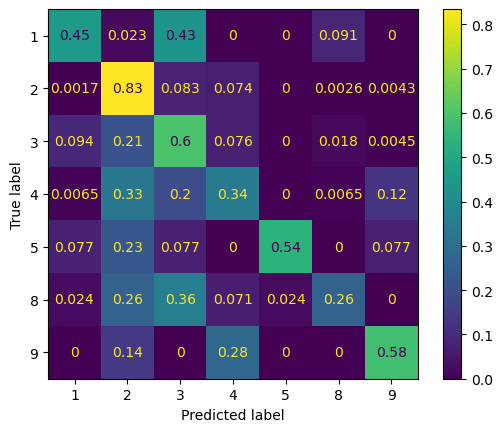

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, model_CV.predict(X_test_central), normalize = "true")
plt.savefig("confusion_matrix.png")